# Heart Disease Dataset Analysis and Machine Learning


---

## Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np

## Data Collection and Processing

In [2]:
heart_data=pd.read_csv(r"E:/College/Training/NTI/multiple-disease-prediction-streamlit-app-main/dataset/heart_expanded.csv")

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


In [4]:
heart_data.shape

(3500, 14)

In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3500 non-null   float64
 1   sex       3500 non-null   float64
 2   cp        3500 non-null   float64
 3   trestbps  3500 non-null   float64
 4   chol      3500 non-null   float64
 5   fbs       3500 non-null   float64
 6   restecg   3500 non-null   float64
 7   thalach   3500 non-null   float64
 8   exang     3500 non-null   float64
 9   oldpeak   3500 non-null   float64
 10  slope     3500 non-null   float64
 11  ca        3500 non-null   float64
 12  thal      3500 non-null   float64
 13  target    3500 non-null   float64
dtypes: float64(14)
memory usage: 382.9 KB


In [6]:
heart_data.describe().style.background_gradient(cmap='viridis')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,54.387143,0.684571,0.956000,131.607143,246.637429,0.145143,0.530857,149.477714,0.333143,1.045914,1.387429,0.737429,2.330857,0.535429
std,9.033019,0.464753,1.025988,17.492797,53.542217,0.352295,0.529676,23.176308,0.471404,1.184231,0.620376,1.032993,0.612079,0.498815
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

## Exploratory Data Analysis (EDA)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [9]:
target_counts = heart_data['target'].value_counts()

fig = px.pie(target_counts, 
             values=target_counts.values, 
             names=target_counts.index, 
             color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_traces(textposition='inside', 
                  textinfo='percent+label', 
                  marker=dict(line=dict(color='white', width=2)))

fig.show()


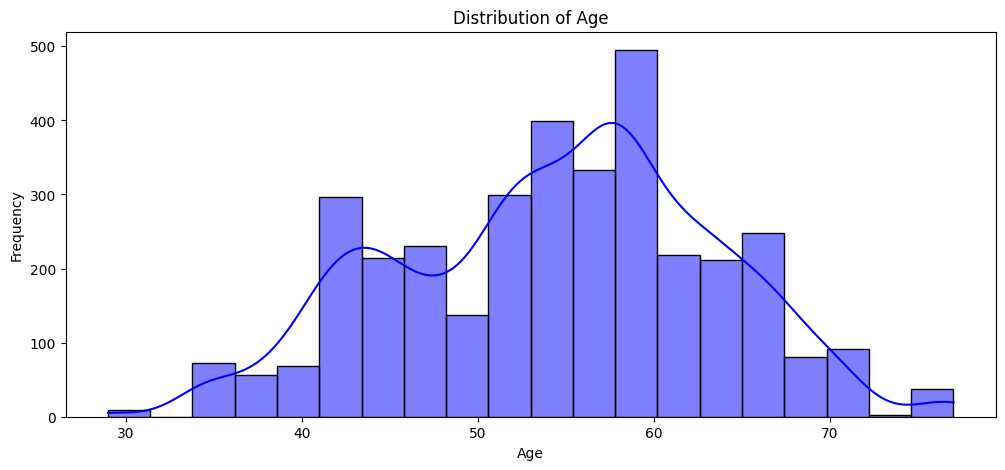

In [10]:
plt.figure(figsize=(12, 5))
sns.histplot(heart_data['age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

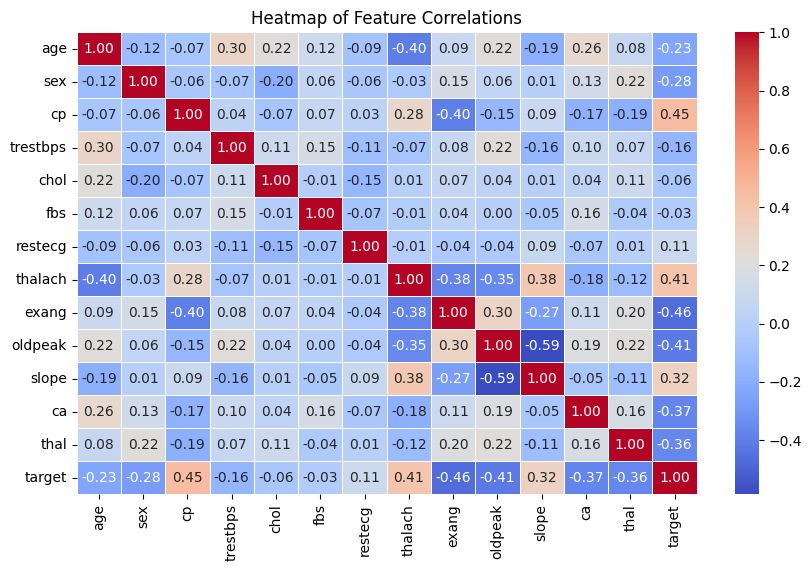

In [11]:
corr_matrix = heart_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()


## Splitting the Features and Target

In [12]:
Features =heart_data.drop(columns='target',axis=1)
Target =heart_data['target']

In [13]:
Features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,44.0,1.0,1.0,120.0,263.0,0.0,1.0,173.0,0.0,0.0,2.0,0.0,3.0
3496,59.0,0.0,0.0,174.0,249.0,0.0,1.0,143.0,1.0,0.0,1.0,0.0,2.0
3497,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0
3498,54.0,1.0,1.0,192.0,283.0,0.0,0.0,195.0,0.0,0.0,2.0,1.0,3.0


In [14]:
Target

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
3495    1.0
3496    0.0
3497    0.0
3498    0.0
3499    0.0
Name: target, Length: 3500, dtype: float64

In [15]:
from sklearn.model_selection import GridSearchCV,train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report

## Splitting the Data into Training data & Test Data

In [16]:
X_train,X_test,y_train,y_test=train_test_split(Features,Target,test_size=0.2,random_state=42,stratify=Target)

##  Define XGBoost classifier


In [17]:
xgb_clf=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

## Hyperparameter tuning using GridSearchCV


In [18]:
param_grid = {
    'n_estimators': [100, 125],  # Increase estimators for better learning
    'learning_rate': [0.01, 0.02],  # Slightly faster convergence
    'max_depth': [3, 4],  # Allow more complex decision boundaries
    'subsample': [0.7, 0.8],  # Utilize more data per tree
    'reg_lambda': [2.0, 3.0],  # Reduce L2 regularization slightly
    'reg_alpha': [0.5, 1.0],  # Reduce L1 regularization slightly
    'min_child_weight': [5, 7]  # Allow smaller splits
}

grid_search = GridSearchCV(xgb_clf, param_grid, cv=7, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

train_acc = best_xgb.score(X_train, y_train) * 100
test_acc = best_xgb.score(X_test, y_test) * 100

Best Parameters: {'learning_rate': 0.02, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 125, 'reg_alpha': 0.5, 'reg_lambda': 2.0, 'subsample': 0.8}


c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning:

[16:07:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




## Accuracy Score

In [20]:
print(f"XGBoost Train Accuracy: {train_acc:.2f}%")
print(f"XGBoost Test Accuracy: {test_acc:.2f}%")

# Classification Report
y_pred = best_xgb.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

XGBoost Train Accuracy: 95.93%
XGBoost Test Accuracy: 95.00%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95       325
         1.0       0.94      0.97      0.95       375

    accuracy                           0.95       700
   macro avg       0.95      0.95      0.95       700
weighted avg       0.95      0.95      0.95       700



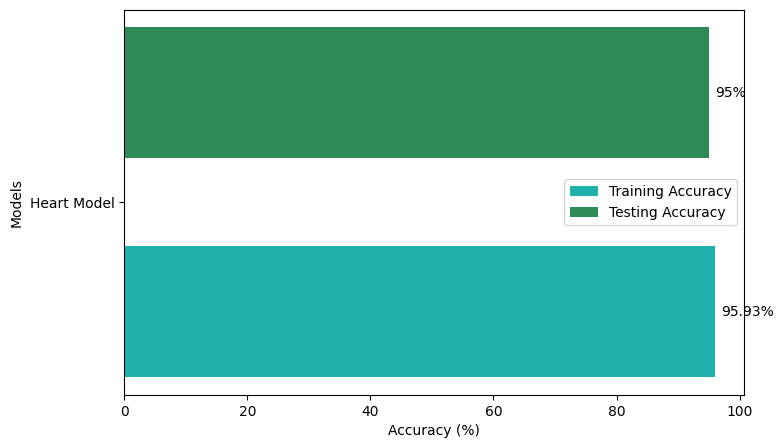

In [21]:
models = ['Heart Model']
training_accuracy = [95.93]
testing_accuracy = [95]

x = np.arange(len(models))  # Label locations
width = 0.3  # Reduced bar width for more spacing
spacing = 0.2  # Additional spacing between bars

fig, ax = plt.subplots(figsize=(8, 5))

# Bars
bars1 = ax.barh(x - (width + spacing)/2, training_accuracy, width, label='Training Accuracy', color='lightseagreen')
bars2 = ax.barh(x + (width + spacing)/2, testing_accuracy, width, label='Testing Accuracy', color='seagreen')

# Labels and Title
ax.set_xlabel('Accuracy (%)')
ax.set_ylabel('Models')
ax.set_yticks(x)
ax.set_yticklabels(models)
ax.legend()

# Adding percentage labels
for bars in [bars1, bars2]:
    for bar in bars:
        ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{bar.get_width()}%', va='center', fontsize=10)

plt.show()


## Test model

In [22]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = best_xgb.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')


[0]
The Person does not have a Heart Disease


## Saving the trained model

In [ ]:
import pickle

In [ ]:
filename = 'heart_disease_model.sav'
pickle.dump(best_xgb, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))